<a href="https://colab.research.google.com/github/ashbornarise/Machine-Learning-research/blob/main/Copy_of_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_train), len(y_test)

(40, 40, 40, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels = y_test,
                     predictions = None):

  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s = 4, label="training")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None :
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


  plt.legend(prop = {"size":14});

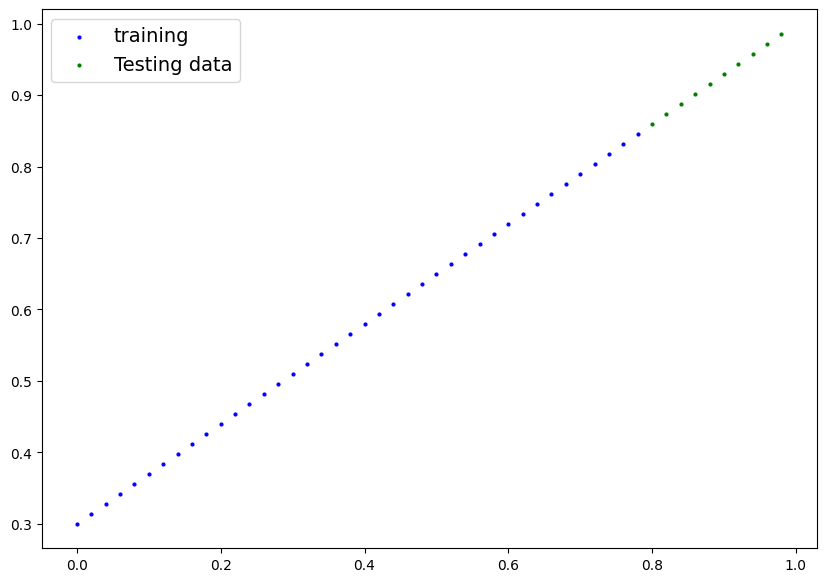

In [ ]:
plot_predictions()

In [ ]:
## Build model

#Create linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias


In [ ]:
#torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([-0.6518], requires_grad=True),
 Parameter containing:
 tensor([-0.2108], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.6518])), ('bias', tensor([-0.2108]))])

In [ ]:
weight, bias

(0.7, 0.3)

Epoch [100/1000], Loss: nan
Epoch [200/1000], Loss: nan
Epoch [300/1000], Loss: nan
Epoch [400/1000], Loss: nan
Epoch [500/1000], Loss: nan
Epoch [600/1000], Loss: nan
Epoch [700/1000], Loss: nan
Epoch [800/1000], Loss: nan
Epoch [900/1000], Loss: nan
Epoch [1000/1000], Loss: nan


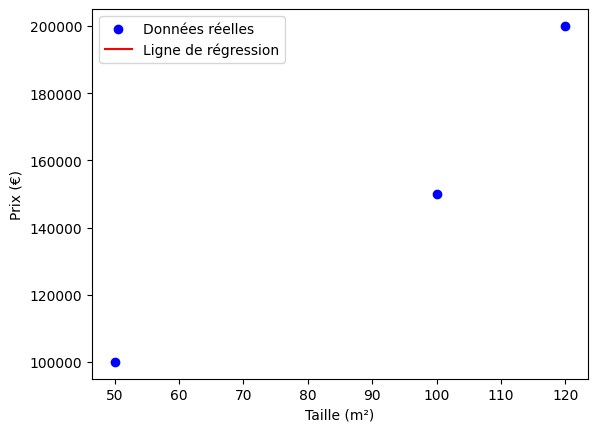

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


X = np.array([50, 100, 120], dtype = np.float32)
Y = np.array([100000, 150000, 200000], dtype = np.float32)

X = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

model = nn.Linear(in_features=1, out_features=1)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 1000

for epoch in range(epochs):

  outputs = model(X)
  loss = criterion(outputs, Y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1)%100 == 0:
    print(f"Epoch [{epoch+1}/{epochs}], Loss:{loss.item():4f}")

predicted_values = model(X).detach().numpy()

plt.scatter(X.numpy(), Y.numpy(), color='blue', label='Données réelles')
plt.plot(X.numpy(), predicted_values, color='red', label='Ligne de régression')
plt.xlabel('Taille (m²)')
plt.ylabel('Prix (€)')
plt.legend()
plt.show()

Exercice 1


Epoch [199/2000], Loss:1.082077
Epoch [399/2000], Loss:0.485819
Epoch [599/2000], Loss:0.218118
Epoch [799/2000], Loss:0.097928
Epoch [999/2000], Loss:0.043967
Epoch [1199/2000], Loss:0.019740
Epoch [1399/2000], Loss:0.008863
Epoch [1599/2000], Loss:0.003979
Epoch [1799/2000], Loss:0.001786
Epoch [1999/2000], Loss:0.000802
Le prix prédit pour une maison de 120 m² est : 116.95 €


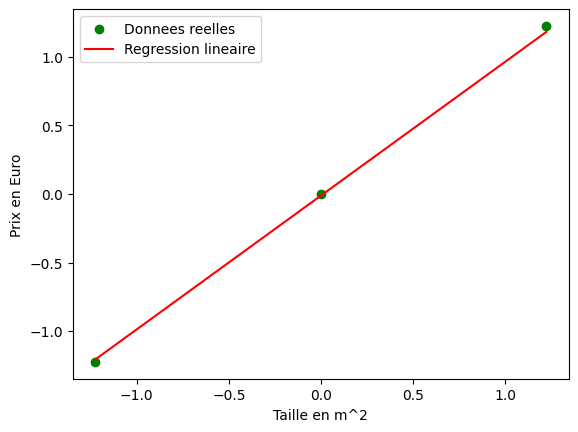

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim


X = [50, 100, 150]
Y = [100000, 200000, 300000]


X = (X - np.mean(X)) / np.std(X)  # Normaliser X
Y = (Y - np.mean(Y)) / np.std(Y)  # Normaliser Y

X = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

model = nn.Linear(in_features=1, out_features=1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
epochs = 2000

for epoch in range(epochs):
  outputs = model(X)
  loss = criterion(outputs, Y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch + 2)%200 == 0:
    print(f"Epoch [{epoch+1}/{epochs}], Loss:{loss.item():4f}")


X_new = torch.tensor([[120]], dtype=torch.float32)  # 120 m²
predicted_price = model(X_new).item()  # .item() pour obtenir la valeur numérique
print(f"Le prix prédit pour une maison de 120 m² est : {predicted_price:.2f} €")

predicted_values = model(X).detach().numpy()

plt.scatter(X.numpy(), Y.numpy(), color = "green", label = "Donnees reelles")
plt.plot(X, predicted_values, color = "red", label = "Regression lineaire")
plt.xlabel("Taille en m^2")
plt.ylabel("Prix en Euro")
plt.legend()
plt.show()

Correction Exercice 1

Epoch [1000/10000], Loss:0.033575
Epoch [2000/10000], Loss:0.000613
Epoch [3000/10000], Loss:0.000011
Epoch [4000/10000], Loss:0.000000
Epoch [5000/10000], Loss:0.000000
Epoch [6000/10000], Loss:0.000000
Epoch [7000/10000], Loss:0.000000
Epoch [8000/10000], Loss:0.000000
Epoch [9000/10000], Loss:0.000000
Epoch [10000/10000], Loss:0.000000
Pente (poids) : 0.9999850988388062
Ordonnée à l'origine (biais) : -1.150138118077848e-08
Le prix prédit pour une maison de 120 m² est : 120.00 €


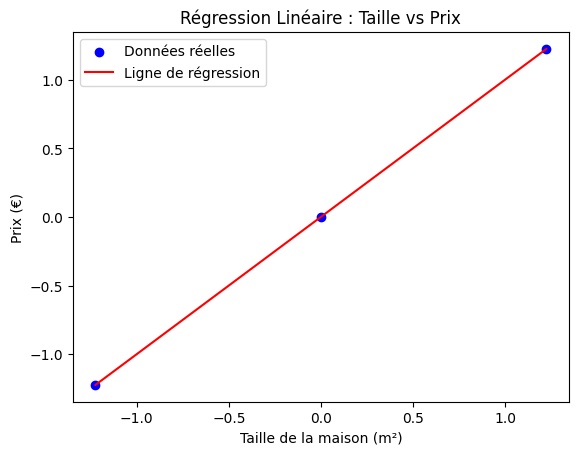

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Données d'exemple
X = np.array([50, 100, 150], dtype=np.float32)
Y = np.array([100000, 150000, 200000], dtype=np.float32)

# Normalisation des données
X = (X - np.mean(X)) / np.std(X)  # Normaliser X
Y = (Y - np.mean(Y)) / np.std(Y)  # Normaliser Y

# Conversion des données en tensors PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

# Créer un modèle de régression linéaire
model = nn.Linear(in_features=1, out_features=1)

# Fonction de perte et optimiseur
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)  # Réduire le taux d'apprentissage

# Entraînement du modèle
epochs = 10000
for epoch in range(epochs):
    # Passer les données par le modèle
    outputs = model(X_tensor)
    loss = criterion(outputs, Y_tensor)

    # Rétropropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Afficher la perte chaque 100 époques
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss:{loss.item():4f}")

# Affichage des paramètres appris
print(f"Pente (poids) : {model.weight.item()}")
print(f"Ordonnée à l'origine (biais) : {model.bias.item()}")

# Prédire le prix d'une maison de 120 m² (normalisée)
X_new = torch.tensor([[(120 - np.mean(X)) / np.std(X)]], dtype=torch.float32)  # Normaliser la valeur de 120 m²
predicted_price = model(X_new).item()  # .item() pour obtenir la valeur numérique
# Dé-normaliser la prédiction
predicted_price_denorm = predicted_price * np.std(Y) + np.mean(Y)  # Revenir à l'échelle originale
print(f"Le prix prédit pour une maison de 120 m² est : {predicted_price_denorm:.2f} €")

# Prédictions et visualisation
predicted_values = model(X_tensor).detach().numpy()

# Tracer les données et la droite de régression
plt.scatter(X, Y, color='blue', label='Données réelles')
plt.plot(X, predicted_values, color='red', label='Ligne de régression')

plt.xlabel('Taille de la maison (m²)')
plt.ylabel('Prix (€)')
plt.legend()
plt.title('Régression Linéaire : Taille vs Prix')
plt.show()


Exercice 2


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


X = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500], dtype = np.float32) #Data input

Y = np.array([100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000], dtype = np.float32) # Data Output

X = (X-np.mean(X))/np.std(X) #normalizer X
Y = (X-np.mean(X))/np.std(X) #normalizer Y

#Turning of Data into torch tensor

X = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(Y, dtype=torch.float32).view(-1, 1)


# Creation of linear regression model




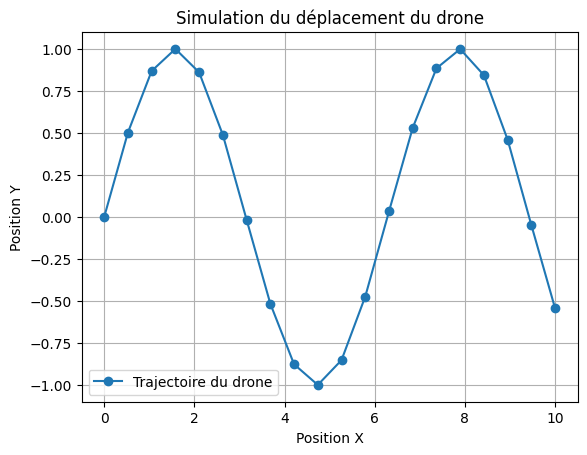

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Coordonnées du drone sur X et Y
x = np.linspace(0, 10, 20)  # Simulation d'un déplacement en X
y = np.sin(x)  # Simulation d'un déplacement en Y

plt.plot(x, y, marker='o', label="Trajectoire du drone")
plt.xlabel("Position X")
plt.ylabel("Position Y")
plt.title("Simulation du déplacement du drone")
plt.legend()
plt.grid()
plt.show()
